**Importing Libraries**


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

**Load the Dataset**

In [ ]:
df=pd.read_csv('StocksData.csv')
df.head(5)

,Date,Open,High,Low,Close,Adj Close,Volume
0,1999-11-18,32.546494,35.765381,28.612303,31.473534,27.068665,62546300
1,1999-11-19,30.713520,30.758226,28.478184,28.880543,24.838577,15234100
2,1999-11-22,29.551144,31.473534,28.657009,31.473534,27.068665,6577800
3,1999-11-23,30.400572,31.205294,28.612303,28.612303,24.607880,5975600
4,1999-11-24,28.701717,29.998211,28.612303,29.372318,25.261524,4843200


In [ ]:
df.tail(5)

,Date,Open,High,Low,Close,Adj Close,Volume
5119,2020-03-26,70.000000,74.449997,69.650002,73.720001,73.532867,3267500
5120,2020-03-27,71.550003,73.209999,70.279999,70.910004,70.730003,1829800
5121,2020-03-30,71.059998,73.180000,71.059998,72.669998,72.669998,1486200
5122,2020-03-31,72.339996,72.800003,70.500000,71.620003,71.620003,1822100
5123,2020-04-01,69.470001,70.230003,68.150002,68.919998,68.919998,2173600


In [ ]:
df.describe()

,Open,High,Low,Close,Adj Close,Volume
count,5124.000000,5124.000000,5124.000000,5124.000000,5124.000000,5.124000e+03
mean,34.090255,34.560553,33.629467,34.106245,31.778674,3.693250e+06
std,18.608831,18.834528,18.381718,18.611595,18.730529,2.481855e+06
min,7.653791,7.961373,7.510730,7.761087,6.674886,2.719000e+05
25%,21.101574,21.452074,20.785050,21.130186,18.790381,2.206475e+06
50%,27.328326,27.703863,27.010015,27.396280,24.714866,3.174050e+06
75%,41.500000,41.860001,41.130001,41.525204,39.203083,4.508075e+06
max,111.587982,115.879829,103.719597,113.733902,97.816307,6.254630e+07


In [ ]:
df.isnull().sum()


,0
Date,0
Open,0
High,0
Low,0
Close,0
Adj Close,0
Volume,0


**Set Date as Index**

In [ ]:
df['Date']=pd.to_datetime(df['Date'])

In [ ]:
df.set_index('Date', inplace=True)

In [ ]:
df.sort_index(inplace=True)

In [ ]:
print(df.head())

                 Open       High        Low      Close  Adj Close    Volume
Date                                                                       
1999-11-18  32.546494  35.765381  28.612303  31.473534  27.068665  62546300
1999-11-19  30.713520  30.758226  28.478184  28.880543  24.838577  15234100
1999-11-22  29.551144  31.473534  28.657009  31.473534  27.068665   6577800
1999-11-23  30.400572  31.205294  28.612303  28.612303  24.607880   5975600
1999-11-24  28.701717  29.998211  28.612303  29.372318  25.261524   4843200


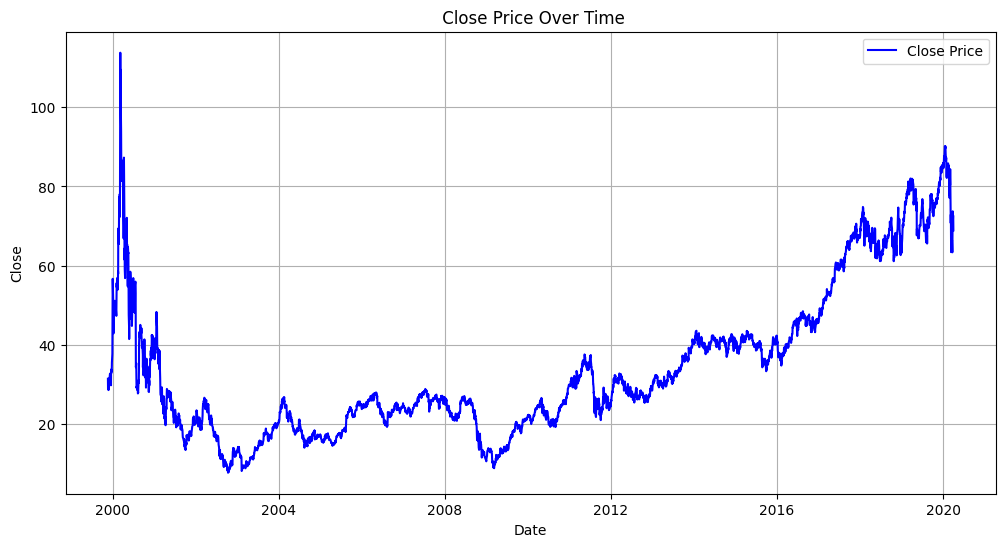

In [ ]:
plt.figure(figsize=(12,6))
plt.plot(df.index,df['Close'],label='Close Price',color='blue')
plt.title(' Close Price Over Time')
plt.xlabel('Date')
plt.ylabel('Close')
plt.legend()
plt.grid(True)
plt.show()

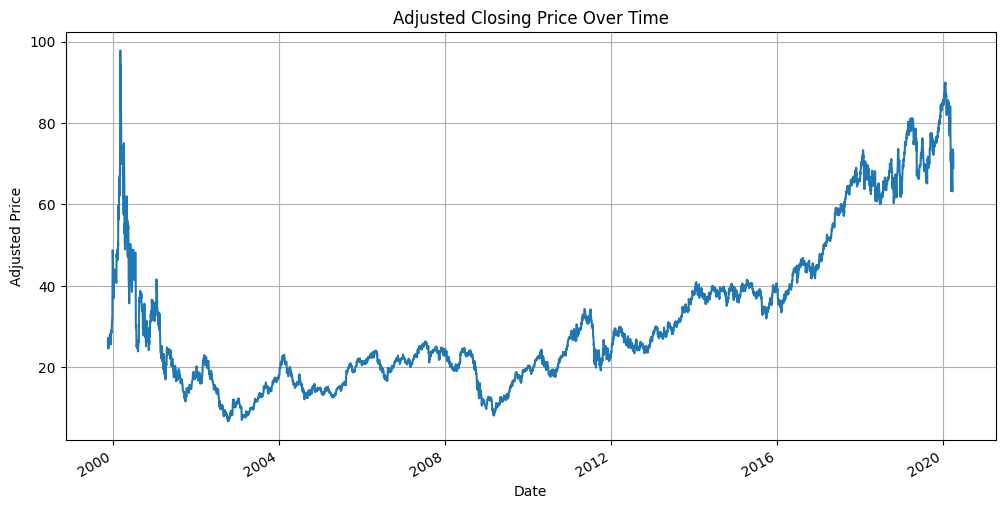

In [ ]:
df['Adj Close'].plot(figsize=(12, 6), title='Adjusted Closing Price Over Time')
plt.xlabel('Date')
plt.ylabel('Adjusted Price')
plt.grid(True)
plt.show()


**Classical Time Series Decomposition**


In [ ]:
from statsmodels.tsa.seasonal import seasonal_decompose
decompositional_additive=seasonal_decompose(df['Close'],model='additive',period=90)


In [ ]:
trend_additive=decompositional_additive.trend
seasonal_additive=decompositional_additive.seasonal
residual_additive=decompositional_additive.resid

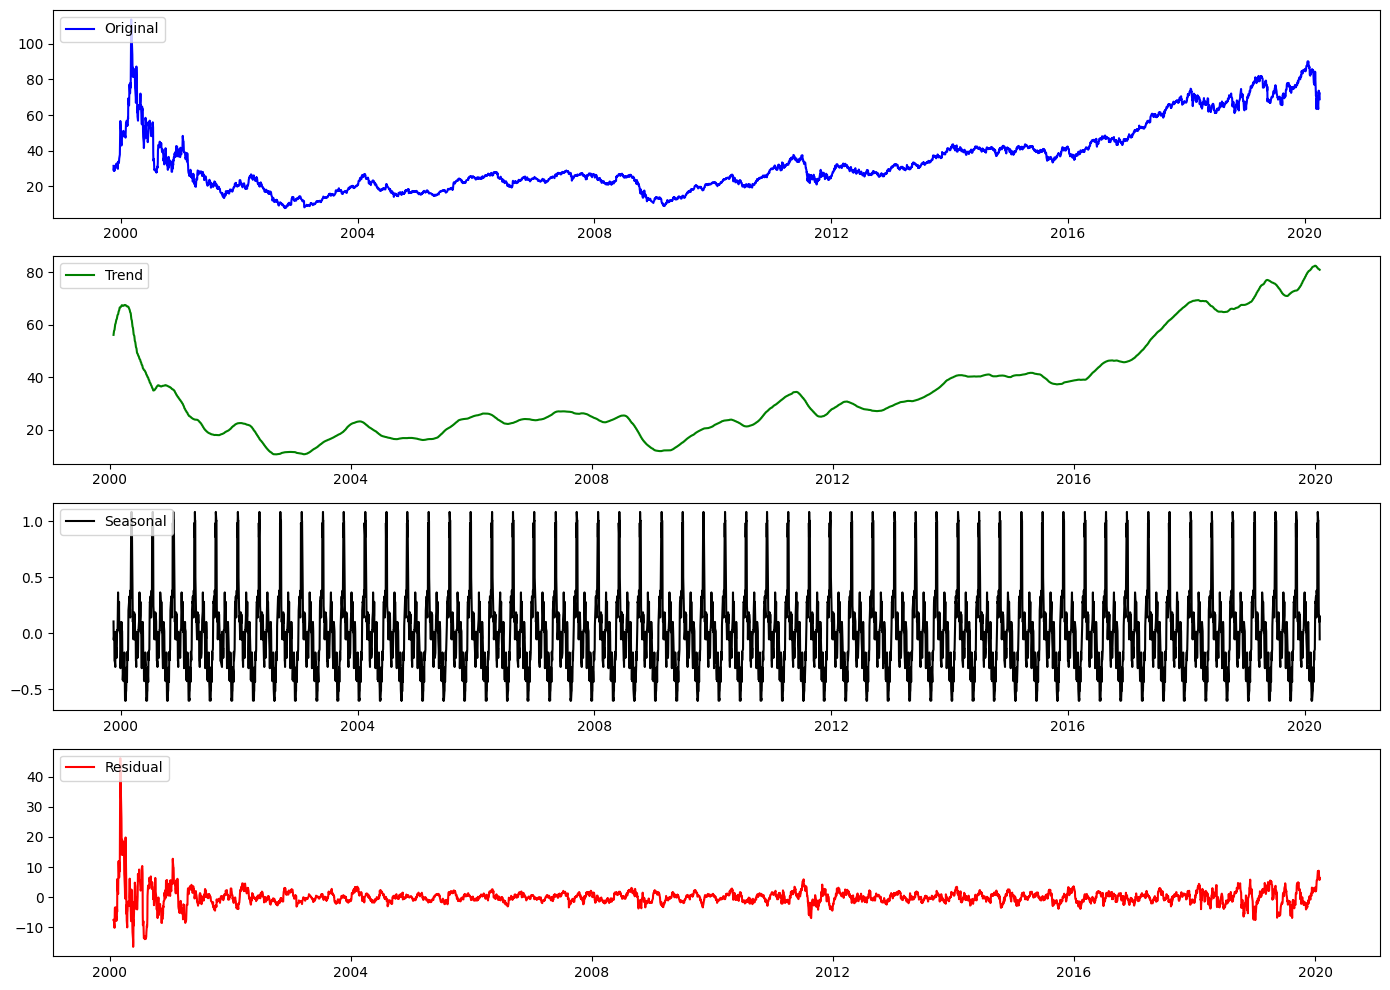

In [ ]:
plt.figure(figsize=(14,10))
plt.subplot(411)
plt.plot(df['Close'],label='Original',color='Blue')
plt.legend(loc='upper left')
plt.subplot(412)
plt.plot(trend_additive,label='Trend',color='green')
plt.legend(loc='upper left')
plt.subplot(413)
plt.plot(seasonal_additive,label='Seasonal',color='black')
plt.legend(loc='upper left')
plt.subplot(414)
plt.plot(residual_additive,label='Residual',color='red')
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()

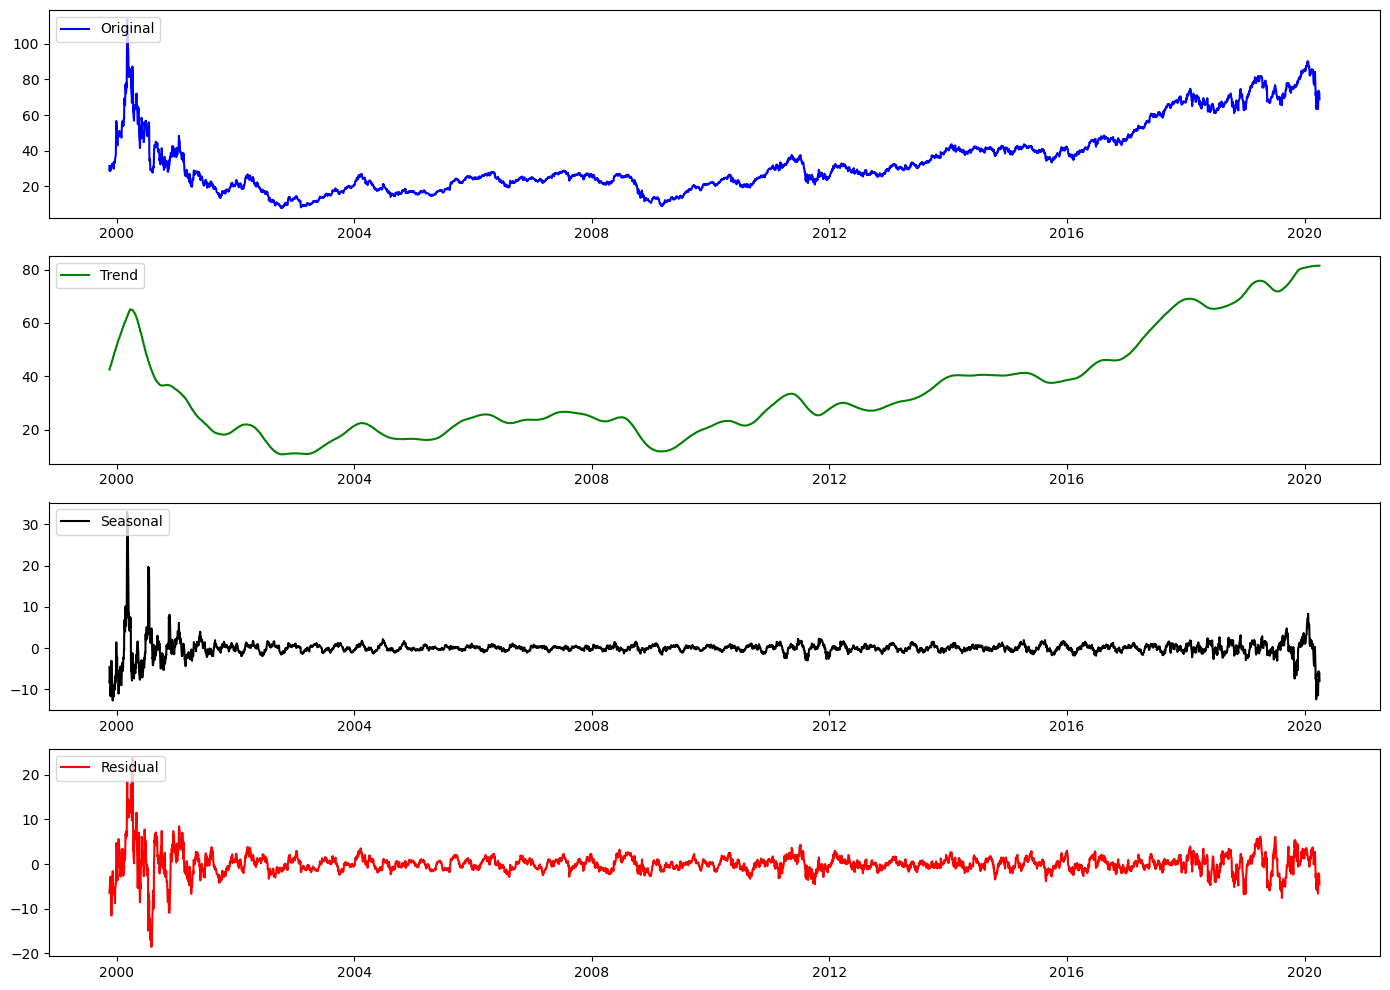

In [ ]:
from statsmodels.tsa.seasonal import STL
#perform STL Decomposition
stl=STL(df['Close'],period=90)
result=stl.fit()
#plot decomposition component

plt.figure(figsize=(14,10))
plt.subplot(411)
plt.plot(result.observed,label='Original',color='blue')
plt.legend(loc='upper left')
plt.subplot(412)
plt.plot(result.trend,label='Trend',color='green')
plt.legend(loc='upper left')
plt.subplot(413)
plt.plot(result.seasonal,label='Seasonal',color='black')
plt.legend(loc='upper left')
plt.subplot(414)
plt.plot(result.resid,label='Residual',color='red')
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()


In [ ]:
from statsmodels.tsa.stattools import adfuller

def ad_test(series):
    dftest = adfuller(series, autolag='AIC')
    print('ADF Statistic:', dftest[0])
    print('p-value:', dftest[1])
    print('Number of lags used:', dftest[2])
    print('Number of observations:', dftest[3])
    print('Critical Values:')
    for key, value in dftest[4].items():
        print(f'   {key}: {value}')



In [ ]:
ad_test(df['Close'])

ADF Statistic: -0.9919240571571193
p-value: 0.7561984073053829
Number of lags used: 33
Number of observations: 5090
Critical Values:
   1%: -3.431635383281896
   5%: -2.862108002627225
   10%: -2.5670723481073487


In [ ]:
df['Close_diff'] = df['Close'].diff().dropna()
ad_test(df['Close_diff'].dropna())


ADF Statistic: -14.401907029719105
p-value: 8.481135442171241e-27
Number of lags used: 32
Number of observations: 5090
Critical Values:
   1%: -3.431635383281896
   5%: -2.862108002627225
   10%: -2.5670723481073487


In [ ]:
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

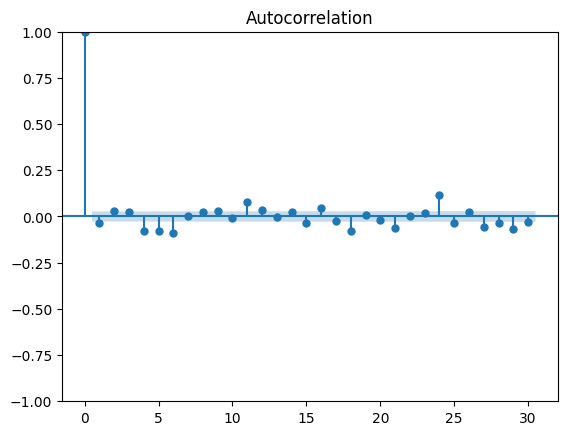

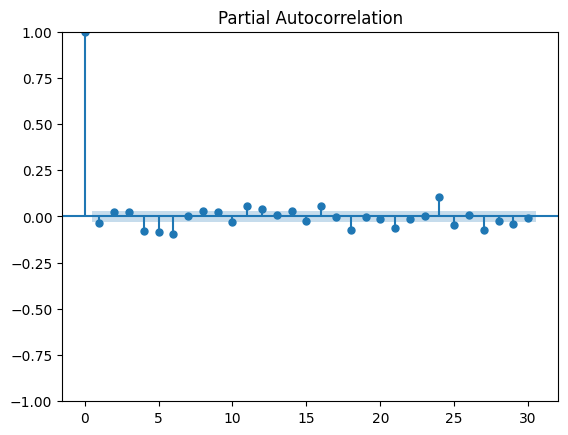

In [ ]:
# Assuming df['Close_diff'] is your stationary series
plot_acf(df['Close_diff'].dropna(), lags=30)
plot_pacf(df['Close_diff'].dropna(), lags=30)
plt.show()


In [ ]:
model = ARIMA(df['Close'], order=(1,1,1))  # Use original series
model_fit = model.fit()
print(model_fit.summary())


/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


                               SARIMAX Results                                
Dep. Variable:                  Close   No. Observations:                 5124
Model:                 ARIMA(1, 1, 1)   Log Likelihood               -7958.329
Date:                Sat, 21 Jun 2025   AIC                          15922.657
Time:                        07:36:33   BIC                          15942.282
Sample:                             0   HQIC                         15929.527
                               - 5124                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.2464      0.089     -2.778      0.005      -0.420      -0.073
ma.L1          0.2088      0.089      2.349      0.019       0.035       0.383
sigma2         1.3087      0.003    515.465      0.0

/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:837: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


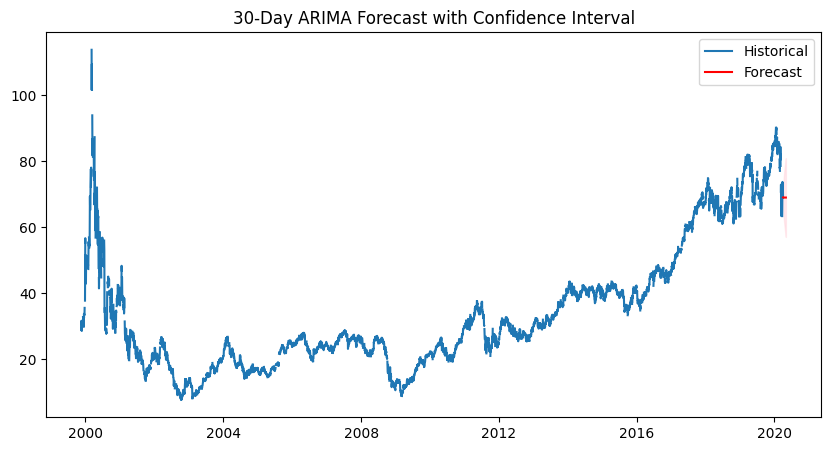

In [ ]:
# Step 1: Generate the forecast
forecast_result = model_fit.get_forecast(steps=30)
mean_forecast = forecast_result.predicted_mean
conf_int = forecast_result.conf_int()

# Step 2: Fix the forecast index to match time frequency
# Make sure your df.index is datetime and has a frequency
df.index = pd.to_datetime(df.index)
df = df.asfreq('D')  # 'D' for daily, or 'M' for monthly depending on your data

# Set the forecast index to follow the last date in your dataset
forecast_index = pd.date_range(start=df.index[-1] + pd.Timedelta(days=1), periods=30, freq='D')
mean_forecast.index = forecast_index
conf_int.index = forecast_index

# Step 3: Plot everything properly aligned
plt.figure(figsize=(10, 5))
plt.plot(df['Close'], label='Historical')
plt.plot(mean_forecast, color='red', label='Forecast')
plt.fill_between(conf_int.index, conf_int.iloc[:, 0], conf_int.iloc[:, 1], color='pink', alpha=0.3)
plt.title("30-Day ARIMA Forecast with Confidence Interval")
plt.legend()
plt.show()



In [ ]:
actual_values = df['Close'][-30:]  # Adjust based on your dataset


In [ ]:
print("NaNs in forecast:", forecast.isna().sum())
print("NaNs in actual:", actual_values.isna().sum())


NaNs in forecast: 0
NaNs in actual: 8


In [ ]:
# Combine and drop NaNs
df_compare = pd.concat([actual_values, forecast], axis=1)
df_compare.columns = ['actual', 'forecast']
df_compare = df_compare.dropna()



In [ ]:
from statsmodels.tsa.arima.model import ARIMA

import pandas as pd

# Fit model

model = ARIMA(df['Close'], order=(1,1,1))

model_fit = model.fit()

# Forecast next 30
forecast_result = model_fit.get_forecast(steps=30)
forecast = forecast_result.predicted_mean

# Compare with actual
actual_values = df['Close'][-30:]
forecast.index = actual_values.index

# Drop NaNs and evaluate
df_compare = pd.concat([actual_values, forecast], axis=1)
df_compare.columns = ['actual', 'forecast']
df_compare = df_compare.dropna()



In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, mean_absolute_percentage_error
import numpy as np

mae = mean_absolute_error(df_compare['actual'], df_compare['forecast'])
mse = mean_squared_error(df_compare['actual'], df_compare['forecast'])
rmse = np.sqrt(mse)
mape = mean_absolute_percentage_error(df_compare['actual'], df_compare['forecast'])

print(f"MAE: {mae:.2f}")
print(f"MSE: {mse:.2f}")
print(f"RMSE: {rmse:.2f}")
print(f"MAPE: {mape*100:.2f}%")


MAE: 4.20
MSE: 34.60
RMSE: 5.88
MAPE: 5.68%


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.statespace.sarimax import SARIMAX
from sklearn.metrics import mean_absolute_error, mean_squared_error, mean_absolute_percentage_error
import numpy as np
df.index = pd.to_datetime(df.index)
df = df.asfreq('D')  # Use 'M' for monthly data if applicable
# Example SARIMA(1,1,1)(1,1,1,7) for weekly seasonality
model = SARIMAX(df['Close'],
                order=(1,1,1),
                seasonal_order=(1,1,1,7),
                enforce_stationarity=False,
                enforce_invertibility=False)

sarima_fit = model.fit()
print(sarima_fit.summary())


                                     SARIMAX Results                                     
Dep. Variable:                             Close   No. Observations:                 7441
Model:             SARIMAX(1, 1, 1)x(1, 1, 1, 7)   Log Likelihood               -7855.565
Date:                           Sat, 21 Jun 2025   AIC                          15721.130
Time:                                   08:05:24   BIC                          15755.693
Sample:                               11-18-1999   HQIC                         15733.005
                                    - 04-01-2020                                         
Covariance Type:                             opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.7545      0.028     26.760      0.000       0.699       0.810
ma.L1         -0.7933      0.027    -29.535

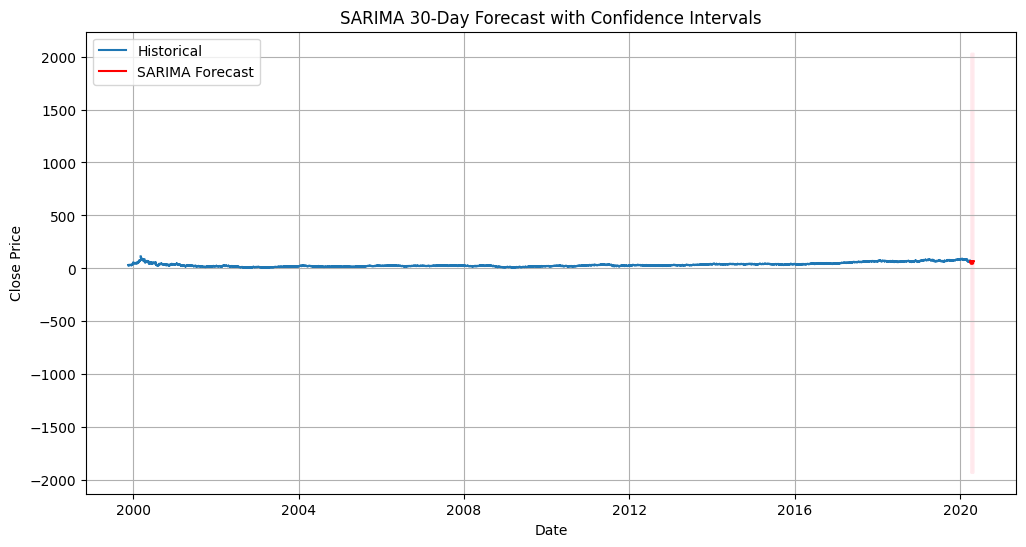

In [ ]:
forecast_result = sarima_fit.get_forecast(steps=30)
forecast = forecast_result.predicted_mean
conf_int = forecast_result.conf_int()

# Generate proper future date index
forecast.index = pd.date_range(start=df.index[-1] + pd.Timedelta(days=1), periods=30, freq='D')
conf_int.index = forecast.index

# Plot
plt.figure(figsize=(12, 6))
plt.plot(df['Close'], label='Historical')
plt.plot(forecast, color='red', label='SARIMA Forecast')
plt.fill_between(conf_int.index, conf_int.iloc[:, 0], conf_int.iloc[:, 1], color='pink', alpha=0.3)
plt.title("SARIMA 30-Day Forecast with Confidence Intervals")
plt.xlabel("Date")
plt.ylabel("Close Price")
plt.legend()
plt.grid()
plt.show()


In [ ]:
# Optional: If you have actual values
actual_values = df['Close'][-30:]
forecast.index = actual_values.index

# Compare
df_compare = pd.concat([actual_values, forecast], axis=1).dropna()
df_compare.columns = ['actual', 'forecast']

mae = mean_absolute_error(df_compare['actual'], df_compare['forecast'])
mse = mean_squared_error(df_compare['actual'], df_compare['forecast'])
rmse = np.sqrt(mse)
mape = mean_absolute_percentage_error(df_compare['actual'], df_compare['forecast'])

print(f"MAE: {mae:.2f}")
print(f"MSE: {mse:.2f}")
print(f"RMSE: {rmse:.2f}")
print(f"MAPE: {mape*100:.2f}%")


MAE: 8.72
MSE: 162.71
RMSE: 12.76
MAPE: 11.96%


In [ ]:
!pip install prophet


In [ ]:
# Assume your time series is in df['Close'] with a DateTime index
df_prophet = df[['Close']].copy()
df_prophet['ds'] = df_prophet.index         # Set the date column
df_prophet['y'] = df_prophet['Close']       # Set the value to forecast
df_prophet = df_prophet[['ds', 'y']]        # Keep only these two columns
df_prophet = df_prophet.dropna()


In [ ]:
from prophet import Prophet

model = Prophet()
model.fit(df_prophet)


INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp3hr707yn/y4u541t_.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp3hr707yn/ci3jrb2f.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=20736', 'data', 'file=/tmp/tmp3hr707yn/y4u541t_.json', 'init=/tmp/tmp3hr707yn/ci3jrb2f.json', 'output', 'file=/tmp/tmp3hr707yn/prophet_model9em8jrza/prophet_model-20250621081413.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
08:14:13 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
08:14:15 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


In [ ]:
# Forecast next 30 days
future = model.make_future_dataframe(periods=30)  # Change to 60/90 if you want more
forecast = model.predict(future)


In [ ]:
from prophet.plot import plot_plotly, plot_components_plotly

# Interactive main forecast plot
plot_plotly(model, forecast)

# View trend + seasonal components
plot_components_plotly(model, forecast)


/usr/local/lib/python3.11/dist-packages/plotly/io/_json.py:560: UserWarning:

Discarding nonzero nanoseconds in conversion.



In [ ]:
# Step 1: Get last 30 days of actual values
actual = df_prophet.set_index('ds')['y'][-30:]

# Step 2: Get predicted values for the same dates
forecast = forecast.set_index('ds')
predicted = forecast.loc[actual.index]['yhat']  # Align on date

# Step 3: Combine
df_compare = pd.concat([actual, predicted], axis=1).dropna()
df_compare.columns = ['actual', 'forecast']

# Step 4: Evaluate
from sklearn.metrics import mean_absolute_error, mean_squared_error, mean_absolute_percentage_error
import numpy as np

mae = mean_absolute_error(df_compare['actual'], df_compare['forecast'])
mse = mean_squared_error(df_compare['actual'], df_compare['forecast'])
rmse = np.sqrt(mse)
mape = mean_absolute_percentage_error(df_compare['actual'], df_compare['forecast'])

print(f"MAE: {mae:.2f}")
print(f"MSE: {mse:.2f}")
print(f"RMSE: {rmse:.2f}")
print(f"MAPE: {mape*100:.2f}%")


MAE: 11.55
MSE: 176.07
RMSE: 13.27
MAPE: 16.62%


In [ ]:
!pip install tensorflow



In [ ]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler

# Use your 'Close' column
data = df[['Close']].copy()
data.dropna(inplace=True)

# Normalize the data
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(data)

# Convert to sequences
def create_sequences(data, seq_len=60):
    X, y = [], []
    for i in range(seq_len, len(data)):
        X.append(data[i-seq_len:i])
        y.append(data[i])
    return np.array(X), np.array(y)

X, y = create_sequences(scaled_data)

# Split into training and testing (e.g., 80% train)
train_size = int(0.8 * len(X))
X_train, X_test = X[:train_size], X[train_size:]
y_train, y_test = y[:train_size], y[train_size:]


In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout

model = Sequential()
model.add(LSTM(units=50, return_sequences=True, input_shape=(X_train.shape[1], 1)))
model.add(Dropout(0.2))
model.add(LSTM(units=50))
model.add(Dropout(0.2))
model.add(Dense(1))

model.compile(optimizer='adam', loss='mean_squared_error')
model.fit(X_train, y_train, epochs=10, batch_size=32)


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.



Epoch 1/10
127/127 ━━━━━━━━━━━━━━━━━━━━ 14s 71ms/step - loss: 0.0072
Epoch 2/10
127/127 ━━━━━━━━━━━━━━━━━━━━ 7s 55ms/step - loss: 7.2093e-04
Epoch 3/10
127/127 ━━━━━━━━━━━━━━━━━━━━ 9s 71ms/step - loss: 6.9759e-04
Epoch 4/10
127/127 ━━━━━━━━━━━━━━━━━━━━ 7s 56ms/step - loss: 6.8353e-04
Epoch 5/10
127/127 ━━━━━━━━━━━━━━━━━━━━ 11s 58ms/step - loss: 6.0678e-04
Epoch 6/10
127/127 ━━━━━━━━━━━━━━━━━━━━ 12s 71ms/step - loss: 5.8736e-04
Epoch 7/10
127/127 ━━━━━━━━━━━━━━━━━━━━ 11s 74ms/step - loss: 7.5424e-04
Epoch 8/10
127/127 ━━━━━━━━━━━━━━━━━━━━ 8s 55ms/step - loss: 5.6829e-04
Epoch 9/10
127/127 ━━━━━━━━━━━━━━━━━━━━ 12s 65ms/step - loss: 5.3894e-04
Epoch 10/10
127/127 ━━━━━━━━━━━━━━━━━━━━ 11s 70ms/step - loss: 4.4691e-04


In [ ]:
predicted = model.predict(X_test)
predicted = scaler.inverse_transform(predicted)
y_test_actual = scaler.inverse_transform(y_test)

# Flatten for comparison
y_test_actual = y_test_actual.flatten()
predicted = predicted.flatten()


32/32 ━━━━━━━━━━━━━━━━━━━━ 3s 60ms/step


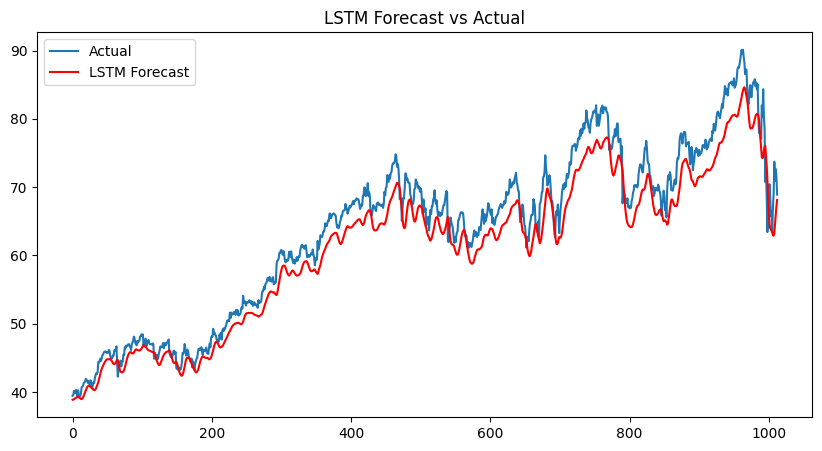

MAE: 2.83
MSE: 10.79
RMSE: 3.29
MAPE: 4.25%


In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import mean_absolute_error, mean_squared_error, mean_absolute_percentage_error

plt.figure(figsize=(10, 5))
plt.plot(y_test_actual, label='Actual')
plt.plot(predicted, label='LSTM Forecast', color='red')
plt.legend()
plt.title("LSTM Forecast vs Actual")
plt.show()

# Metrics
mae = mean_absolute_error(y_test_actual, predicted)
mse = mean_squared_error(y_test_actual, predicted)
rmse = np.sqrt(mse)
mape = mean_absolute_percentage_error(y_test_actual, predicted)

print(f"MAE: {mae:.2f}")
print(f"MSE: {mse:.2f}")
print(f"RMSE: {rmse:.2f}")
print(f"MAPE: {mape*100:.2f}%")


Model	  MAE	    RMSE	   MAPE	   Accuracy

LSTM	 2.83 	  3.29 	  4.25% 	95.75%  (Best)

ARIMA	 4.20	  5.88	  5.68%	   ~94.3%    2nd best

SARIMA	8.72	12.76	 11.96% ~88%   

Prophet	11.55	13.27	16.62%  ~83.4%
